In [56]:
import numpy as np
from pc_kriging import PC_Kriging
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import norm
from numpy import genfromtxt
import pickle
import pandas as pd

%matplotlib notebook

In [57]:
Pf_ref_1, Pf_ref_2, Pf_ref_3 = 0.031154, 0.148128, 0.050391     #MCS_samples = 500000  # test points
B_ref_1 , B_ref_2 , B_ref_3= - norm.ppf( Pf_ref_1 ) , - norm.ppf( Pf_ref_2 ), - norm.ppf( Pf_ref_3 )

# Reliability index error

Combined training with U Function

In [ ]:
# Loading final pf results for all experiments

number_experiments = 15
initial_doe = 10
active_points = 40
last_modelname = '49points'     #key to access dictionary

Pf_results = np.zeros ((number_experiments, 2))    # 2 limit states
B_error = np.zeros ((number_experiments, 2))
Pf_evol_1 = np.zeros ((active_points, number_experiments))
Pf_evol_2 = np.zeros ((active_points, number_experiments))


for Batch in range (0, number_experiments):
    
    model_name_1 = 'Batch_' + str(Batch+1) +'_CAT_ULOO_BDiffer40p_LS1.sav'
    model_name_2 = 'Batch_' + str(Batch+1) +'_CAT_ULOO_BDiffer40p_LS2.sav'
    
    model_1 = pickle.load(open(model_name_1, 'rb'))
    model_2 = pickle.load(open(model_name_2, 'rb'))
    
    #results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 
    
    Pf_results [Batch, 0] = model_1[last_modelname][1]
    Pf_results [Batch, 1] = model_2[last_modelname][1]
    
    for points in range (0, active_points):

        Pf_evol_1[points, Batch] = model_1[str(points + initial_doe) + 'points'][1]
        Pf_evol_2[points, Batch] = model_2[str(points + initial_doe) + 'points'][1]
    
    
B_results = - norm.ppf( Pf_results )    #reliability index

B_error[:,0] = abs(B_results[ : , 0] - B_ref_1 ) / B_ref_1     #limit state 1
B_error[:,1] = abs(B_results[ : , 1] - B_ref_2 ) / B_ref_2     #limit state 2

print ('LS1: ', np.mean(B_error[:,0]), np.var (B_error[:,0])) 
print ('LS2: ', np.mean(B_error[:,1]), np.var (B_error[:,1]))

In [ ]:
#saving B error results---------------------------------------------

# filename1 = 'MeanVar_CATBDiff_EFFLOO_2LS.sav'
# pickle.dump(B_error, open(filename1, 'wb'))

#saving Pf evolution results---------------------------------------------
pf_evol = [Pf_evol_1, Pf_evol_2]

filename2 = 'Pf_evol_Bdiff_ULOO_2LS.sav'
pickle.dump(pf_evol, open(filename2, 'wb'))

Single training with 2LS

In [ ]:
# Loading final pf results for all experiments

number_experiments = 15

last_modelname = '49points'     #key to access dictionary

Pf_results = np.zeros ((number_experiments, 2))    # 2 limit states
B_error = np.zeros ((number_experiments, 2))

for Batch in range (0, number_experiments):
    
    model_name_1 = 'Batch_' + str(Batch+1) +'_AT1_EFF_40p_LS1.sav'
    model_name_2 = 'Batch_' + str(Batch+1) +'_AT1_EFF_40p_LS3.sav'
    model_1 = pickle.load(open(model_name_1, 'rb'))
    model_2 = pickle.load(open(model_name_2, 'rb'))
    
    #results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 
    
    Pf_results [Batch, 0] = model_1[last_modelname][1]
    Pf_results [Batch, 1] = model_2[last_modelname][1]
    
B_results = - norm.ppf( Pf_results )    #reliability index

B_error[:,0] = abs(B_results[ : , 0] - B_ref_1 ) / B_ref_1     #limit state 1
B_error[:,1] = abs(B_results[ : , 1] - B_ref_3 ) / B_ref_3     #CHECK REF LIMIT STATE


#####################################################################################
# in case a limit state has any pf = 0 

penalization = 10e-7
ls_penal = 1

Pf_corr = pd.DataFrame(Pf_results[:,ls_penal])      #check colum with values to penalize
Pf_corr.replace([0], (penalization), inplace=True)
B_penal = - norm.ppf(Pf_corr)

B_error[:,ls_penal] = abs(B_penal.reshape(-1) - B_ref_3 ) / B_ref_3

#####################################################################################
print ('LS1: ', np.mean(B_error[:,0]), np.var (B_error[:,0])) 
print ('LS2: ', np.mean(B_error[:,1]), np.var (B_error[:,1]))

In [ ]:
#saving results------------------------------------

filename1 = 'MeanVar_AT1_EFF_LS1_3.sav'
pickle.dump(B_error, open(filename1, 'wb'))

In [ ]:
#load results file----------------------------------------

filename1 = 'Batch_10_AT2_EFF_40p_LS1.sav'
loaded_model1 = pickle.load(open(filename1, 'rb'))
# loaded_model1 = pickle.load(open(filename, 'rb'))


In [ ]:
# for points in range(10,50):
#     training_points = str(points) + 'points'
#     print (loaded_model1[training_points][1])

Single training with 1LS (Only RP53 ref problem)

In [ ]:
# Loading final pf results for all experiments

number_experiments = 15

last_modelname = '49points'     #key to access dictionary

Pf_results = np.zeros (number_experiments)
B_error = np.zeros (number_experiments)

for Batch in range (0, number_experiments):
    
    model_name_1 = 'Batch_' + str(Batch + 1 ) +'_AT_EFF_Loo_40p_LS1.sav'
    
    model_1 = pickle.load(open(model_name_1, 'rb'))
    
    #results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 
    
    Pf_results [Batch] = model_1[last_modelname][1]
    
B_results = - norm.ppf( Pf_results )    #reliability index

B_error = abs(B_results - B_ref_1 ) / B_ref_1     #limit state 1

print ('LS1: ', np.mean(B_error), np.var (B_error)) 

In [ ]:
#saving results---------------------------------------------

filename1 = 'MeanVar_EFFLOO_1LS.sav'
pickle.dump(B_error, open(filename1, 'wb'))

# Combined training with simulator

In [ ]:
# Loading final pf results for all experiments

initial_doe = 5
number_experiments = 10
active_points = 45

last_modelname = str(active_points+initial_doe - 1 ) + 'points'     #key to access dictionary

Pf_results = np.zeros ((number_experiments, 2))    # 2 limit states
Pf_evol_1 = np.zeros ((active_points, number_experiments))
Pf_evol_2 = np.zeros ((active_points, number_experiments))

# Surrogate_history = {}

# B_error = np.zeros ((number_experiments, 2))

for Batch in range (0, number_experiments):
    
    model_name_1 = 'Batch_' + str(Batch+1) +'_AT1_U_LOO_45p_LS1.sav'
    model_name_2 = 'Batch_' + str(Batch+1) +'_AT1_U_LOO_45p_LS2.sav'
    model_1 = pickle.load(open(model_name_1, 'rb'))
    model_2 = pickle.load(open(model_name_2, 'rb'))
    
    for points in range (0, active_points):

        Pf_evol_1[points, Batch] = model_1[str(points + initial_doe) + 'points'][1]
        Pf_evol_2[points, Batch] = model_2[str(points + initial_doe) + 'points'][1]
            
    #results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 
    
    Pf_results [Batch, 0] = model_1[last_modelname][1]
    Pf_results [Batch, 1] = model_2[last_modelname][1]

In [ ]:
pf_evol = [Pf_evol_1, Pf_evol_2]
#saving results---------------------------------------------

filename1 = 'Pf_evol_AT1_U_LOO_Matlab.sav'
pickle.dump(pf_evol, open(filename1, 'wb'))

In [ ]:
#load model
filename = 'Batch_1_seq_ULOO_45p_LS1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#after loading the results file - each dictionary key means:
#results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 

loaded_model['49points']

# Check a single model result

In [ ]:
#load model
filename = 'Matlab/Batch_10_seq_ULOO_40p_LS1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#after loading the results file - each dictionary key means:
#results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 

loaded_model['44points']

In [ ]:
# Loading final pf results for all experiments

number_experiments = 1

last_modelname = '49points'     #key to access dictionary

Pf_results = np.zeros ((number_experiments, 2))    # 2 limit states
B_error = np.zeros ((number_experiments, 2))

for Batch in range (0, number_experiments):
    
    model_name_1 = 'Batch_' + str(Batch+10) +'_CATSeq_EFFLOO_40p_LS1.sav'
    model_name_2 = 'Batch_' + str(Batch+10) +'_CATSeq_EFFLOO_40p_LS2.sav'
    
    model_1 = pickle.load(open(model_name_1, 'rb'))
    model_2 = pickle.load(open(model_name_2, 'rb'))
    
    #results file ['# total training points'] = { Surrogate , Pf, CoV_Pf , eLoo , mse } 
    
    Pf_results [Batch, 0] = model_1[last_modelname][1]
    Pf_results [Batch, 1] = model_2[last_modelname][1]

# Plotting

Loading external result files

In [58]:
# for Relative reliability error metric --------------------------------------
#training LS1
MeanVar_U1_2LS = 'SingleT_2LS_test/MeanVar_2test_AT1_U_2LS.sav'
MeanVar_ULOO1_2LS = 'SingleT_2LS_test/MeanVar_2test_AT1_ULOO_2LS.sav'

B_error_AC1_U_2LS = pickle.load(open(MeanVar_U1_2LS, 'rb'))
B_error_AC1_ULOO_2LS = pickle.load(open(MeanVar_ULOO1_2LS, 'rb'))

#training LS2
MeanVar_U2_2LS = 'SingleT_2LS/LS2/MeanVar_AT2_U_2LS.sav'
MeanVar_ULOO2_2LS = 'SingleT_2LS/LS2/MeanVar_AT2_ULOO_2LS.sav'

B_error_AC2_U_2LS = pickle.load(open(MeanVar_U2_2LS, 'rb'))
B_error_AC2_ULOO_2LS = pickle.load(open(MeanVar_ULOO2_2LS, 'rb'))

#Sequential training
MeanVar_SEQU_2LS = 'Combined/Sequential/MeanVar_CATSeq_U_2LS.sav'
MeanVar_SEQULOO_2LS = 'Combined/Sequential/MeanVar_CATSeq_ULOO_2LS.sav'

B_error_SEQU_2LS = pickle.load(open(MeanVar_SEQU_2LS, 'rb'))
B_error_SEQULOO_2LS = pickle.load(open(MeanVar_SEQULOO_2LS, 'rb'))

#B-Diff training
MeanVar_DiffU_2LS = 'Combined/Bdiff/MeanVar_CATBDiff_U_2LS.sav'
MeanVar_Diff_ULOO_2LS = 'Combined/Bdiff/MeanVar_CAT_ULOO_BDiffer_2LS.sav'

B_error_DiffU_2LS = pickle.load(open(MeanVar_DiffU_2LS, 'rb'))
B_error_Diff_ULOO_2LS = pickle.load(open(MeanVar_Diff_ULOO_2LS, 'rb'))

# data collection by strategies ------------------------------------------------
# U = [B_error_AC1_U_2LS, B_error_AC2_U_2LS, B_error_SEQU_2LS, B_error_DiffU_2LS]
# ULOO = [B_error_AC1_ULOO_2LS, B_error_AC2_ULOO_2LS, B_error_SEQULOO_2LS, B_error_Diff_ULOO_2LS]
U = [B_error_SEQU_2LS, B_error_DiffU_2LS, B_error_AC1_U_2LS, B_error_AC2_U_2LS]
ULOO = [B_error_SEQULOO_2LS, B_error_Diff_ULOO_2LS, B_error_AC1_ULOO_2LS, B_error_AC2_ULOO_2LS]

strategies = [U, ULOO]

# for pf evoluation --------------------------------------

# Single training ----------------------------------------

file1 = 'SingleT_2LS/LS1/Pf_evol_AT1_U_2LS.sav'
AC1_U_pf_evol = pickle.load(open(file1, 'rb'))

file2 = 'SingleT_2LS/LS1/Pf_evol_AT1_ULOO_2LS.sav'
AC1_ULOO_pf_evol = pickle.load(open(file2, 'rb'))

file3 = 'SingleT_2LS/LS2/Pf_evol_AT2_U_2LS.sav'
AC2_U_pf_evol = pickle.load(open(file3, 'rb'))

file4 = 'SingleT_2LS/LS2/Pf_evol_AT2_ULOO_2LS.sav'
AC2_ULOO_pf_evol = pickle.load(open(file4, 'rb'))

# combined training ----------------------------------------

file1 = 'Combined/Sequential/Pf_evol_Seq_U_2LS.sav'
Seq_U_pf_evol = pickle.load(open(file1, 'rb'))

file2 = 'Combined/Sequential/Pf_evol_Seq_ULOO_2LS.sav'
Seq_ULOO_pf_evol = pickle.load(open(file2, 'rb'))

file3 = 'Combined/BDiff/Pf_evol_Bdiff_U_2LS.sav'
Bdiff_U_pf_evol = pickle.load(open(file3, 'rb'))

file4 = 'Combined/BDiff/Pf_evol_Bdiff_ULOO_2LS.sav'
Bdiff_ULOO_pf_evol = pickle.load(open(file4, 'rb'))

case1_input_evol_U = [Seq_U_pf_evol, Bdiff_U_pf_evol, AC1_U_pf_evol, AC2_U_pf_evol]
case1_input_evol_ULOO = [Seq_ULOO_pf_evol, Bdiff_ULOO_pf_evol, AC1_ULOO_pf_evol, AC2_ULOO_pf_evol ]

In [59]:
#Loading Matlab file results

file1 = 'Matlab/Pf_evol_SeqMatlab.sav'
Seq_pf_evol = pickle.load(open(file1, 'rb'))

file2 = 'Matlab/Pf_evol_BDiffMatlab.sav'
Diff_pf_evol = pickle.load(open(file2, 'rb'))

file3 = 'Matlab/Pf_evol_AC1Matlab.sav'
AC1_evol = pickle.load(open(file3, 'rb'))

file4 = 'Matlab/Pf_evol_AC2_Matlab.sav'
AC2_evol = pickle.load(open(file4, 'rb'))

input_evol = [ Seq_pf_evol, Diff_pf_evol, AC1_evol, AC2_evol]

Plotting

<IPython.core.display.Javascript object>


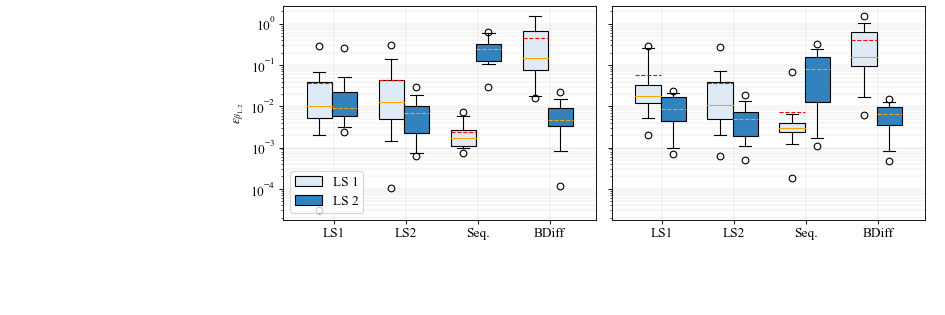

In [40]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

fig1, axs = plt.subplots(1, 2 , figsize=(30*cm, 10*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.3, right=.98, top=0.98, bottom=0.3, hspace = 0.65, wspace=0.05)

axs[0].set_ylabel(r'$\varepsilon_{\beta_{1,2}}$')

axs[0].set_title("U")
axs[1].set_title("U + LOO")

for active in range(len(strategies)):
    
    for ind in range(len(strategies[0])):  
       
        Nll_MtlMean = strategies[active][ind][:,0]      
        Nll_MtnMean = strategies[active][ind][:,1]

        ls1 = axs[active].boxplot(Nll_MtlMean, positions = [ind], patch_artist = True, widths = 0.35, meanline = True, 
                whis = [2.5,97.5], boxprops=dict(facecolor='#deebf7'), showfliers=True, showmeans=True, 
                medianprops = dict(linewidth=1, color='orange', ls='-'), meanprops=dict(color='red'))

        ls2 = axs[active].boxplot(Nll_MtnMean, positions = [ind+0.35], patch_artist = True, widths = 0.35, meanline = True, 
                whis = [2.5,97.5], boxprops=dict(facecolor='#3182bd'), showfliers=True, showmeans=False, 
                medianprops = dict(linewidth=1, color='orange', ls='--'), meanprops=dict(color='red'))



    axs[active].set_xticks([0.2, 1.2 , 2.2, 3.2])
    axs[active].set_xticklabels(['LS1','LS2','Seq.','BDiff'])
    axs[active].grid(True, which="both", linewidth = 0.2)
    axs[active].set_yscale('log')

axs[0].legend([ls1["boxes"][0], ls2["boxes"][0]], [r'LS 1', r'LS 2'], loc='lower left')

In [ ]:
len(strategies[0])

<IPython.core.display.Javascript object>


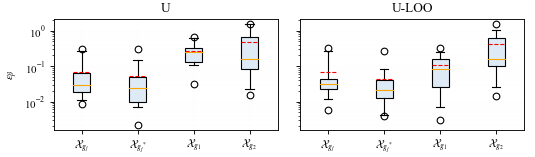

In [129]:
# from matplotlib import rc, font_manager

cm = 1/2.54  # centimeters in inches
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['font.size'] = 10
plt.rcParams['text.usetex'] = False
# plt.rcParams['mathtext.rm'] = 'times new roman'
# plt.rcParams['mathtext.it'] = 'times new roman:italic'
# plt.rcParams['mathtext.bf'] = 'times new roman:bold'
plt.rcParams['mathtext.fontset'] = 'stix'

## The following settings allow you to select the fonts in math mode.
#mathtext.fontset: dejavusans  # Should be 'dejavusans' (default),
                               # 'dejavuserif', 'cm' (Computer Modern), 'stix',
                               # 'stixsans' or 'custom'

fig1, axs = plt.subplots(1, 2 , figsize=(17*cm, 5*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
# plt.subplots_adjust(left=0.1, right=0.98, top=0.90, bottom=0.14, hspace = 0.65, wspace=0.10)
plt.subplots_adjust(left=0.1, right=0.98, top=0.88, bottom=0.17, hspace = 0.65, wspace=0.10)

max_points = 45

# fig1.legend([fig1["boxes"][0]], [r'Global error'], loc='lower left')
axs[0].set_ylabel(r'$\varepsilon_{\beta}$')

axs[0].set_title("U")
axs[1].set_title("U-LOO")

# fig1.legend([r'Global error'], loc='lower left')

for active in range(len(strategies)):
    
    for ind in range(len(strategies[0])):  
       
        Nll_MtlMean = strategies[active][ind][:,0] + strategies[active][ind][:,1]     

        ls1 = axs[active].boxplot(Nll_MtlMean, positions = [ind+0.2], patch_artist = True, widths = 0.3, meanline = True, 
                whis = [2.5 , 97.5], boxprops=dict(facecolor='#deebf7'), showfliers=True, showmeans=True, 
                medianprops = dict(linewidth=1, color='orange', ls='-'), meanprops=dict(color='red'))

    axs[active].set_xticks([0.2, 1.2 , 2.2, 3.2])
    axs[active].set_xticklabels(['$\mathcal{X}_{g_j}$', r'$\mathcal{X}_{g^*_j}$', r'$\mathcal{X}_{g_1}$',r'$\mathcal{X}_{g_2}$'])   
    axs[active].grid(True, which="both", linewidth = 0.1, linestyle='-', color='#f0f0f0')
    axs[active].set_yscale('log')


# fig1.savefig('Figures/Relative Reliability error estimator.pdf')
fig1.savefig('Figures/Relative Reliability error estimator_red.pdf')

In [ ]:
active = 0
ind = 0

print(np.mean(strategies[active][ind][:,0]), np.std(strategies[active][ind][:,0]) )
print(np.mean(strategies[active][ind][:,1]),  np.std(strategies[active][ind][:,1])  )

<IPython.core.display.Javascript object>


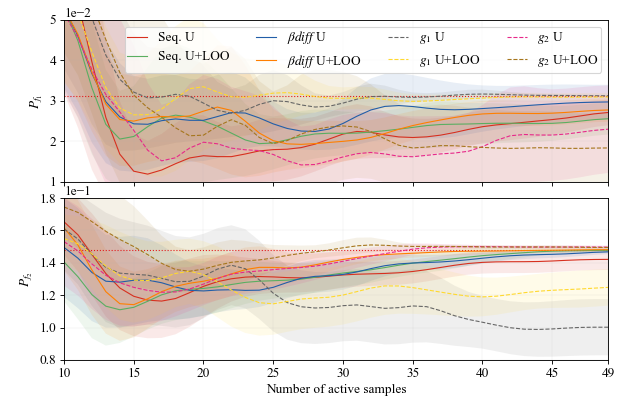

In [37]:
cm = 1 #/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams['mathtext.fontset'] = 'stix'

fig3, axs = plt.subplots(2,1, figsize=(8*cm, 5*cm), sharey='row', sharex = 'col', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, hspace = 0.1, wspace=0.1)

initial_points = 10
active_points = 40

training_points = [i for i in range(initial_points, initial_points+active_points)]
# specifying horizontal line type
axs[0].axhline(y = Pf_ref_1, color = '#e31a1c', linestyle = ':', lw=1.0)
axs[1].axhline(y = Pf_ref_2, color = '#e31a1c', linestyle = ':', lw=1.0 )
# axs[1].legend()

method = [ "Seq. U",  "Seq. U+LOO", r'$\beta diff$ U',r'$\beta diff$ U+LOO' , "$g_1$ U", "$g_1$ U+LOO", "$g_2$ U", "$g_2$ U+LOO"]
L_style = [ ['-', "-"], ["-", "-"] , ["-", "-"] , ["-", "-"], ["--", "--"], ["--", "--"], ["--", "--"], ["--", "--"] ]
colors = [ ["#d7301f", "#d7301f"], ["#5aae61", "#5aae61"] , ["#225ea8", "#225ea8"] , ["#ff7f00", "#ff7f00"], ["#666666", "#666666"], ["#ffd92f", "#ffd92f"], ["#e7298a", "#e7298a"], ["#a6761d", "#a6761d"] ]

n_samples = len(case1_input_evol[0][0][0])


for pf_estim in range (len(case1_input_evol[0])):

    for strategy in range (len(case1_input_evol)):
        
        mean_pf_1 = np.mean(case1_input_evol[strategy][pf_estim], axis=1)
        std_pf_1 = np.std(case1_input_evol[strategy][pf_estim], axis=1)
        confid_interv = 1.96 * (std_pf_1 / np.sqrt(n_samples)) 
        
        sigma_std1 = 1.5

        axs[pf_estim].plot(training_points, gaussian_filter1d(mean_pf_1, sigma=1.5), L_style[strategy][pf_estim], lw=1.0, label=method[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim].fill_between(training_points, gaussian_filter1d(mean_pf_1+confid_interv, sigma=sigma_std1), gaussian_filter1d(mean_pf_1-confid_interv, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)

# axs[active].legend([ls1["boxes"][0]], [r'Global error'], loc='lower left')


    axs[pf_estim].grid(True, which="both", linewidth = 0.1)
    axs[pf_estim].set_xlim(initial_points, max_points)
    
handles, labels = axs[pf_estim].get_legend_handles_labels()
axs[0].legend(handles, labels, loc='upper right',  ncol=4, borderpad=0.2, labelspacing=0.5, handlelength=1.5)

axs[0].set_ylabel(r'$P_{f_1}$' )
axs[0].plot([initial_points, 49])
axs[1].set_ylabel(r'$P_{f_2}$' )
axs[1].set_xlabel('Number of active samples')
axs[0].set_xlim([initial_points, 49])
axs[0].set_ylim([0.01, 0.05])

axs[0].set_xlim([initial_points, 49])
axs[1].set_ylim([0.08, 0.18])

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

axs[1].set_xticks([10,15,20,25,30,35,40,45,49])
# axs[1].set_xticklabels(['10','15','20','25','30','35','40','45','49'])

# rendering the plot
plt.show()
# fig3.savefig('Figures/Case1_Pf_Evolution.pdf')

<IPython.core.display.Javascript object>


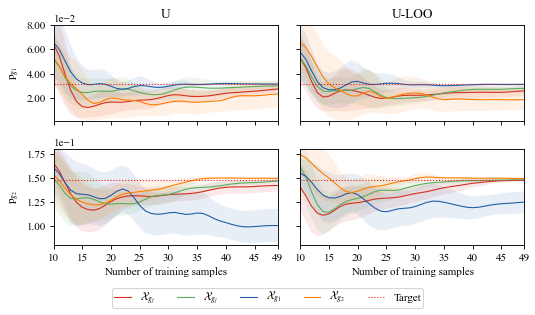

In [125]:
from matplotlib.ticker import ScalarFormatter
# Extend ScalarFormatter
class MyScalarFormatter(ScalarFormatter):
    # Override '_set_format' with your own
    def _set_format(self):
        self.format = '%.2f'  # Show 1 decimals
        
custom_formatter = MyScalarFormatter(useMathText=None)


cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig3, axs = plt.subplots(2,2, figsize=(17*cm, 10*cm), sharey='row', sharex = 'col', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=0.98, top=0.92, bottom=0.22, hspace = 0.3, wspace=0.1)

initial_points = 10
active_points = 40

axs[0,0].set_title("U")
axs[0,1].set_title("U-LOO")

training_points = [i for i in range(initial_points, initial_points+active_points)]

method_U = [ r'$\mathcal{X}_{g_j}$', r'$\mathcal{X}_{g_j}$', "$\mathcal{X}_{g_1}$", "$\mathcal{X}_{g_2}$"  ]
method_ULOO = [ r'$\mathbf{x}_{g_j}^*$ U-LOO', r'$\mathbf{x}_{g^*_j}^*$ U-LOO' ,"$\mathbf{x}_{g_2}^*$ U-LOO", "$\mathbf{x}_{g_2}^*$ U-LOO"]

colors = [ ["#d7301f", "#d7301f"], ["#5aae61", "#5aae61"] , ["#225ea8", "#225ea8"] , ["#ff7f00", "#ff7f00"] ]

n_samples = len(case1_input_evol_U[0][0][0])

for pf_estim in range (len(case1_input_evol_U[0])):

    axs[pf_estim, 0].grid(True, which="both", linewidth = 0.1, color='#f0f0f0')
    axs[pf_estim, 0].set_xlim(initial_points, max_points)
    
    axs[pf_estim, 1].grid(True, which="both", linewidth = 0.1, color='#f0f0f0')
    axs[pf_estim, 1].set_xlim(initial_points, max_points)
    
    for strategy in range (len(case1_input_evol_U)):   #U and U+LOO
        
        sigma_std1 = 1.5
        
        mean_pf_U = np.mean(case1_input_evol_U[strategy][pf_estim], axis=1)
        std_pf_U = np.std(case1_input_evol_U[strategy][pf_estim], axis=1)
        confid_interv = 1.96 * (std_pf_U / np.sqrt(n_samples)) 
        
        
        axs[pf_estim, 0].plot(training_points, gaussian_filter1d(mean_pf_U, sigma=1.5), lw=1.0, label=method_U[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim, 0].fill_between(training_points, gaussian_filter1d(mean_pf_U+confid_interv, sigma=sigma_std1), gaussian_filter1d(mean_pf_U-confid_interv, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)

        #----------------------------------------------------------------
        mean_pf_ULOO = np.mean(case1_input_evol_ULOO[strategy][pf_estim], axis=1)
        std_pf_ULOO = np.std(case1_input_evol_ULOO[strategy][pf_estim], axis=1)
        confid_interv = 1.96 * (std_pf_ULOO / np.sqrt(n_samples)) 
        
        axs[pf_estim, 1].plot(training_points, gaussian_filter1d(mean_pf_ULOO, sigma=1.5), lw=1.0, label=method_ULOO[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim, 1].fill_between(training_points, gaussian_filter1d(mean_pf_ULOO+confid_interv, sigma=sigma_std1), gaussian_filter1d(mean_pf_ULOO-confid_interv, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)
    
    # specifying horizontal ref line
    axs[pf_estim, 0].axhline(y = Pf_ref[pf_estim], color = '#e31a1c', linestyle = ':', lw=1.0 ,label="Target")
    axs[pf_estim, 1].axhline(y = Pf_ref[pf_estim], color = '#e31a1c', linestyle = ':', lw=1.0 ,label="Target" )
        
# axs[active].legend([ls1["boxes"][0]], [r'Global error'], loc='lower left')
    
handles, labels = axs[pf_estim, 0].get_legend_handles_labels()
fig3.legend(handles, labels, loc='lower center',  ncol=5, borderpad=0.2, labelspacing=0.5, handlelength=1.5)
axs[1,0].set_xlabel('Number of training samples')
axs[1,1].set_xlabel('Number of training samples')

axs[0,0].set_ylabel(r'$\mathrm{p}_{g_1}$' )
axs[0,0].plot([initial_points, 49])

axs[1,0].set_ylabel(r'$\mathrm{p}_{g_2}$' )
# axs[1].set_xlabel('Number of active samples')

axs[1,0].set_xlim([initial_points, 49])
axs[0,0].set_ylim([0.001, 0.08])
axs[0,0].yaxis.set_major_formatter(custom_formatter)

axs[1,1].set_xlim([initial_points, 49])
axs[1,0].set_ylim([0.08, 0.18])

axs[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=None)
axs[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=None)
axs[1, 0].set_xticks([10,15,20,25,30,35,40,45,49])

axs[1, 1].set_xticks([10,15,20,25,30,35,40,45,49])

# rendering the plot
plt.show()
fig3.savefig('Figures/Case1_Pf_Evolution.pdf')

## Percentiles

<IPython.core.display.Javascript object>


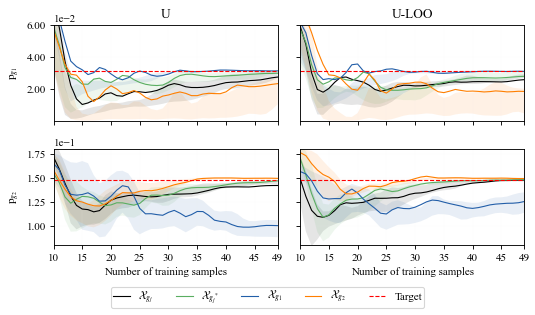

In [182]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig3, axs = plt.subplots(2,2, figsize=(17*cm, 10*cm), sharey='row', sharex = 'col', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=0.98, top=0.92, bottom=0.22, hspace = 0.3, wspace=0.1)

initial_points = 10
active_points = 40

axs[0,0].set_title("U")
axs[0,1].set_title("U-LOO")

training_points = [i for i in range(initial_points, initial_points+active_points)]

method = [ [r'$\mathbf{x}_{g_j}^*$', r'$\mathbf{x}_{g_j}^*$'], [r'$\mathbf{x}_{g^*_j}^*$' ,r'$\mathbf{x}_{g^*_j}^*$'] , 
          ["$\mathbf{x}_{g_1}^*$", "$\mathbf{x}_{g_1}^*$"], ["$\mathbf{x}_{g_2}^*$", "$\mathbf{x}_{g_2}^*$"]]

Pf_ref = [Pf_ref_1, Pf_ref_2]
methods = [ r'$\mathbf{x}_{g_j}^*$', r'$\mathbf{x}_{g^*_j}^*$', "$\mathbf{x}_{g_1}^*$", "$\mathbf{x}_{g_2}^*$" ]

method_U = [ r'$\mathcal{X}_{g_j}$', r'$\mathcal{X}_{g^*_j}$', "$\mathcal{X}_{g_1}$", "$\mathcal{X}_{g_2}$"  ]
method_ULOO = [ r'$\mathbf{x}_{g_j}^*$ U-LOO', r'$\mathbf{x}_{g^*_j}^*$ U-LOO' ,"$\mathbf{x}_{g_2}^*$ U-LOO", "$\mathbf{x}_{g_2}^*$ U-LOO"]

colors = [ ["k", "k"], ["#5aae61", "#5aae61"] , ["#225ea8", "#225ea8"] , ["#ff7f00", "#ff7f00"] ]

n_samples = len(case1_input_evol_U[0][0][0])

for pf_estim in range (len(case1_input_evol_U[0])):

    for strategy in range (len(case1_input_evol_U)):   #U and U+LOO
        
        sigma_std1 = 1
        
        mean_pf_U = np.mean(case1_input_evol_U[strategy][pf_estim], axis=1)
        per25_pf_U = np.percentile(case1_input_evol_U[strategy][pf_estim], 30, axis=1)
        per75_pf_U = np.percentile(case1_input_evol_U[strategy][pf_estim], 60, axis=1)
#         std_pf_U = np.std(case1_input_evol_U[strategy][pf_estim], axis=1)
#         confid_interv = 1.96 * (std_pf_U / np.sqrt(n_samples)) 
        
        
        axs[pf_estim, 0].plot(training_points, gaussian_filter1d(mean_pf_U, sigma=sigma_std1), lw=1.0, label=method_U[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim, 0].fill_between(training_points, gaussian_filter1d(per25_pf_U, sigma=sigma_std1), gaussian_filter1d(per75_pf_U, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)

        #----------------------------------------------------------------
        mean_pf_ULOO = np.mean(case1_input_evol_ULOO[strategy][pf_estim], axis=1)
        per25_pf_ULOO = np.percentile(case1_input_evol_ULOO[strategy][pf_estim], 30, axis=1)
        per75_pf_ULOO = np.percentile(case1_input_evol_ULOO[strategy][pf_estim], 60, axis=1)
#         std_pf_ULOO = np.std(case1_input_evol_ULOO[strategy][pf_estim], axis=1)
#         confid_interv = 1.96 * (std_pf_ULOO / np.sqrt(n_samples)) 
        
        axs[pf_estim, 1].plot(training_points, gaussian_filter1d(mean_pf_ULOO, sigma=sigma_std1), lw=1.0, label=method_ULOO[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim, 1].fill_between(training_points, gaussian_filter1d(per25_pf_ULOO, sigma=sigma_std1), gaussian_filter1d(per75_pf_ULOO, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)
    
    # specifying horizontal ref line
    axs[pf_estim, 0].axhline(y = Pf_ref[pf_estim], color = 'r', linestyle = '--', lw=1.0 ,label="Target")
    axs[pf_estim, 1].axhline(y = Pf_ref[pf_estim], color = 'r', linestyle = '--', lw=1.0 ,label="Target" )
        
# axs[active].legend([ls1["boxes"][0]], [r'Global error'], loc='lower left')

    axs[pf_estim, 0].grid(True, which="both", linewidth = 0.1, color='#f0f0f0')
    axs[pf_estim, 0].set_xlim(initial_points, max_points)
    
    axs[pf_estim, 1].grid(True, which="both", linewidth = 0.1, color='#f0f0f0')
    axs[pf_estim, 1].set_xlim(initial_points, max_points)
    
handles, labels = axs[pf_estim, 0].get_legend_handles_labels()
fig3.legend(handles, labels, loc='lower center',  ncol=5, borderpad=0.2, labelspacing=0.5, handlelength=1.5)
axs[1,0].set_xlabel('Number of training samples')
axs[1,1].set_xlabel('Number of training samples')

axs[0,0].set_ylabel(r'$\mathrm{p}_{g_1}$' )
axs[0,0].plot([initial_points, 49])

axs[1,0].set_ylabel(r'$\mathrm{p}_{g_2}$' )
# axs[1].set_xlabel('Number of active samples')

axs[1,0].set_xlim([initial_points, 49])
axs[0,0].set_ylim([0.00001, 0.06])
axs[0,0].yaxis.set_major_formatter(custom_formatter)

axs[1,1].set_xlim([initial_points, 49])
axs[1,0].set_ylim([0.08, 0.18])

axs[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1, 0].set_xticks([10,15,20,25,30,35,40,45,49])

axs[1, 1].set_xticks([10,15,20,25,30,35,40,45,49])
# axs[1].set_xticklabels(['10','15','20','25','30','35','40','45','49'])

# rendering the plot
plt.show()
fig3.savefig('Figures/Case1_Pf_Evolution_perc.pdf')

With dashed lines instead of fill between

<IPython.core.display.Javascript object>


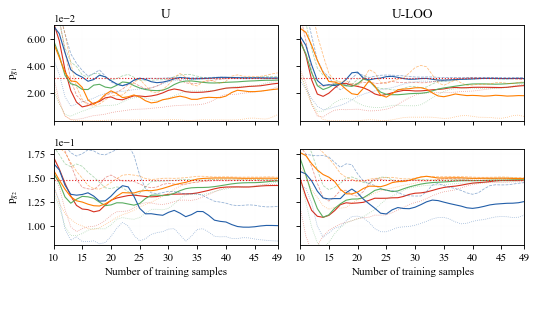

In [164]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig3, axs = plt.subplots(2,2, figsize=(17*cm, 10*cm), sharey='row', sharex = 'col', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=0.98, top=0.92, bottom=0.22, hspace = 0.3, wspace=0.1)

initial_points = 10
active_points = 40

axs[0,0].set_title("U")
axs[0,1].set_title("U-LOO")

training_points = [i for i in range(initial_points, initial_points+active_points)]

method = [ [r'$\mathbf{x}_{g_j}^*$', r'$\mathbf{x}_{g_j}^*$'], [r'$\mathbf{x}_{g^*_j}^*$' ,r'$\mathbf{x}_{g^*_j}^*$'] , 
          ["$\mathbf{x}_{g_1}^*$", "$\mathbf{x}_{g_1}^*$"], ["$\mathbf{x}_{g_2}^*$", "$\mathbf{x}_{g_2}^*$"]]

Pf_ref = [Pf_ref_1, Pf_ref_2]
methods = [ r'$\mathbf{x}_{g_j}^*$', r'$\mathbf{x}_{g^*_j}^*$', "$\mathbf{x}_{g_1}^*$", "$\mathbf{x}_{g_2}^*$" ]

method_U = [ r'$\mathcal{X}_{g_j}$', r'$\mathcal{X}_{g^*_j}$', "$\mathcal{X}_{g_1}$", "$\mathcal{X}_{g_2}$"  ]
method_ULOO = [ r'$\mathbf{x}_{g_j}^*$ U-LOO', r'$\mathbf{x}_{g^*_j}^*$ U-LOO' ,"$\mathbf{x}_{g_2}^*$ U-LOO", "$\mathbf{x}_{g_2}^*$ U-LOO"]

colors = [ ["#d7301f", "#d7301f"], ["#5aae61", "#5aae61"] , ["#225ea8", "#225ea8"] , ["#ff7f00", "#ff7f00"] ]

n_samples = len(case1_input_evol_U[0][0][0])

for pf_estim in range (len(case1_input_evol_U[0])):

    for strategy in range (len(case1_input_evol_U)):   #U and U+LOO
        
        sigma_std1 = 1
        
        mean_pf_U = np.mean(case1_input_evol_U[strategy][pf_estim], axis=1)
        per25_pf_U = np.percentile(case1_input_evol_U[strategy][pf_estim], 25, axis=1)
        per75_pf_U = np.percentile(case1_input_evol_U[strategy][pf_estim], 75, axis=1)       
        
        axs[pf_estim, 0].plot(training_points, gaussian_filter1d(mean_pf_U, sigma=sigma_std1), lw=1.0, label=method_U[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim, 0].plot(training_points, gaussian_filter1d(per25_pf_U, sigma=sigma_std1),':', lw=0.7, label=method_U[strategy], color=colors[strategy][pf_estim], alpha=0.5)
        axs[pf_estim, 0].plot(training_points, gaussian_filter1d(per75_pf_U, sigma=sigma_std1),'--', lw=0.7, label=method_U[strategy], color=colors[strategy][pf_estim], alpha=0.5)

        #----------------------------------------------------------------
        mean_pf_ULOO = np.mean(case1_input_evol_ULOO[strategy][pf_estim], axis=1)
        per25_pf_ULOO = np.percentile(case1_input_evol_ULOO[strategy][pf_estim], 25, axis=1)
        per75_pf_ULOO = np.percentile(case1_input_evol_ULOO[strategy][pf_estim], 75, axis=1)
        
        axs[pf_estim, 1].plot(training_points, gaussian_filter1d(mean_pf_ULOO, sigma=sigma_std1), lw=1.0, label=method_ULOO[strategy], color=colors[strategy][pf_estim])
        axs[pf_estim, 1].plot(training_points, gaussian_filter1d(per25_pf_ULOO, sigma=sigma_std1),':', lw=0.7, label=method_ULOO[strategy], color=colors[strategy][pf_estim], alpha=0.5)
        axs[pf_estim, 1].plot(training_points, gaussian_filter1d(per75_pf_ULOO, sigma=sigma_std1),'--', lw=0.7, label=method_ULOO[strategy], color=colors[strategy][pf_estim], alpha=0.5)
        
#         axs[pf_estim, 1].fill_between(training_points, gaussian_filter1d(per25_pf_ULOO, sigma=sigma_std1), gaussian_filter1d(per75_pf_ULOO, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)
    
    # specifying horizontal ref line
    axs[pf_estim, 0].axhline(y = Pf_ref[pf_estim], color = '#e31a1c', linestyle = ':', lw=1.0 ,label="Target")
    axs[pf_estim, 1].axhline(y = Pf_ref[pf_estim], color = '#e31a1c', linestyle = ':', lw=1.0 ,label="Target" )

    axs[pf_estim, 0].grid(True, which="both", linewidth = 0.1, color='#f0f0f0')
    axs[pf_estim, 0].set_xlim(initial_points, max_points)
    
    axs[pf_estim, 1].grid(True, which="both", linewidth = 0.1, color='#f0f0f0')
    axs[pf_estim, 1].set_xlim(initial_points, max_points)
    
handles, labels = axs[pf_estim, 0].get_legend_handles_labels()
# fig3.legend(handles, labels, loc='lower center',  ncol=5, borderpad=0.2, labelspacing=0.5, handlelength=1.5)
axs[1,0].set_xlabel('Number of training samples')
axs[1,1].set_xlabel('Number of training samples')

axs[0,0].set_ylabel(r'$\mathrm{p}_{g_1}$' )
axs[0,0].plot([initial_points, 49])

axs[1,0].set_ylabel(r'$\mathrm{p}_{g_2}$' )
# axs[1].set_xlabel('Number of active samples')

axs[1,0].set_xlim([initial_points, 49])
axs[0,0].set_ylim([0.0001, 0.07])
axs[0,0].yaxis.set_major_formatter(custom_formatter)

axs[1,1].set_xlim([initial_points, 49])
axs[1,0].set_ylim([0.08, 0.18])

axs[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1, 0].set_xticks([10,15,20,25,30,35,40,45,49])

axs[1, 1].set_xticks([10,15,20,25,30,35,40,45,49])
# axs[1].set_xticklabels(['10','15','20','25','30','35','40','45','49'])

# rendering the plot
plt.show()
fig3.savefig('Figures/Case1_Pf_Evolution_dashed.pdf')

In [ ]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig3, axs = plt.subplots(2,1, figsize=(17*cm, 10*cm), sharey='row', sharex = 'col', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.10, right=0.98, top=0.92, bottom=0.22, hspace = 0.3, wspace=0.1)

initial_points = 5
active_points = 45

axs[0].set_title("U-LOO")

training_points = [i for i in range(initial_points, initial_points+active_points)]

method = [ [r'$\mathbf{x}_{g_j}^*$', r'$\mathbf{x}_{g_j}^*$'], [r'$\mathbf{x}_{g^*_j}^*$' ,r'$\mathbf{x}_{g^*_j}^*$'] , 
          ["$\mathbf{x}_{g_F}^*$", "$\mathbf{x}_{g_F}^*$"], ["$\mathbf{x}_{g_d}^*$", "$\mathbf{x}_{g_d}^*$"]]
L_style = [ ['-', "-"], ["-", "-"] , ["-", "-"] , ["-", "-"]]

colors = [ ["#d7301f", "#d7301f"], ["#5aae61", "#5aae61"] , ["#225ea8", "#225ea8"] , ["#ff7f00", "#ff7f00"] ]

n_samples = len(input_evol[0][0][0])



for pf_estim in range (len(input_evol[0])):

    for strategy in range (len(input_evol)):
        
        mean_pf_1 = np.mean(input_evol[strategy][pf_estim], axis=1)
        std_pf_1 = np.std(input_evol[strategy][pf_estim], axis=1)
        confid_interv = 1.96 * (std_pf_1 / np.sqrt(n_samples)) 
        
        sigma_std1 = 1.5

        axs[pf_estim].plot(training_points, gaussian_filter1d(mean_pf_1, sigma=1.5), L_style[strategy][pf_estim] , lw=1, label=method[strategy][pf_estim], color=colors[strategy][pf_estim])
        axs[pf_estim].fill_between(training_points, gaussian_filter1d(mean_pf_1+confid_interv, sigma=sigma_std1), gaussian_filter1d(mean_pf_1-confid_interv, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)

# axs[active].legend([ls1["boxes"][0]], [r'Global error'], loc='lower left')


    axs[pf_estim].grid(True, which="both", linewidth = 0.2, color='#f0f0f0')
    axs[pf_estim].set_xlim(initial_points, max_points)
    
handles, labels = axs[pf_estim].get_legend_handles_labels()
fig3.legend(handles, labels, loc='lower center',  ncol=4, borderpad=0.2, labelspacing=0.5, handlelength=1.5)
    
axs[0].set_ylabel(r'$\mathrm{p}_{g_F}$' )
axs[1].set_ylabel(r'$\mathrm{p}_{g_d}$' )
axs[1].set_xlabel('Number of training samples')
axs[0].set_xlim([initial_points, 49])
axs[0].set_ylim([0.0003, 0.0007])

axs[0].set_xlim([initial_points, 49])
axs[1].set_ylim([0.13, 0.15])

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1].set_xticks([5, 10,15,20,25,30,35,40,45,49])

fig3.savefig('Figures/Case_CollisionEvolution.pdf')
    

<IPython.core.display.Javascript object>


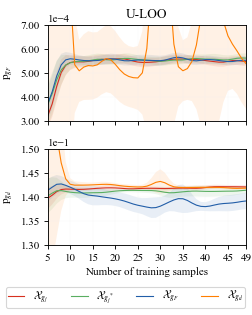

In [127]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig3, axs = plt.subplots(2,1, figsize=(8*cm, 10*cm), sharey='row', sharex = 'col', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.19, right=0.98, top=0.92, bottom=0.22, hspace = 0.3, wspace=0.1)

initial_points = 5
active_points = 45

axs[0].set_title("U-LOO")

training_points = [i for i in range(initial_points, initial_points+active_points)]
method_U = [ r'$\mathcal{X}_{g_j}$', r'$\mathcal{X}_{g_j}$', "$\mathcal{X}_{g_1}$", "$\mathcal{X}_{g_2}$"  ]

method = [ [r'$\mathcal{X}_{g_j}$', r'$\mathcal{X}_{g_j}$'], [r'$\mathcal{X}_{g^*_j}$', r'$\mathcal{X}_{g^*_j}$'] , 
          [r'$\mathcal{X}_{g_F}$', r'$\mathcal{X}_{g_F}$'], [r'$\mathcal{X}_{g_d}$', r'$\mathcal{X}_{g_d}$']]
L_style = [ ['-', "-"], ["-", "-"] , ["-", "-"] , ["-", "-"]]

colors = [ ["#d7301f", "#d7301f"], ["#5aae61", "#5aae61"] , ["#225ea8", "#225ea8"] , ["#ff7f00", "#ff7f00"] ]

n_samples = len(input_evol[0][0][0])

#         sigma_std1 = 1
        
#         mean_pf_U = np.mean(case1_input_evol_U[strategy][pf_estim], axis=1)
#         per25_pf_U = np.percentile(case1_input_evol_U[strategy][pf_estim], 30, axis=1)
#         per75_pf_U = np.percentile(case1_input_evol_U[strategy][pf_estim], 70, axis=1)

for pf_estim in range (len(input_evol[0])):

    for strategy in range (len(input_evol)):
        
        mean_pf_1 = np.mean(input_evol[strategy][pf_estim], axis=1)
        
        std_pf_1 = np.std(input_evol[strategy][pf_estim], axis=1)
        confid_interv = 1.96 * (std_pf_1 / np.sqrt(n_samples)) 
        
        sigma_std1 = 1.5

        axs[pf_estim].plot(training_points, gaussian_filter1d(mean_pf_1, sigma=1.5), L_style[strategy][pf_estim] , lw=1, label=method[strategy][pf_estim], color=colors[strategy][pf_estim])
        axs[pf_estim].fill_between(training_points, gaussian_filter1d(mean_pf_1+confid_interv, sigma=sigma_std1), gaussian_filter1d(mean_pf_1-confid_interv, sigma=sigma_std1), facecolor=colors[strategy][pf_estim], alpha=0.1)

# axs[active].legend([ls1["boxes"][0]], [r'Global error'], loc='lower left')


    axs[pf_estim].grid(True, which="both", linewidth = 0.2, color='#f0f0f0')
    axs[pf_estim].set_xlim(initial_points, max_points)
    
handles, labels = axs[pf_estim].get_legend_handles_labels()
fig3.legend(handles, labels, loc='lower center',  ncol=4, borderpad=0.2, labelspacing=0.5, handlelength=1.5)
    
axs[0].set_ylabel(r'$\mathrm{p}_{g_F}$' )
axs[1].set_ylabel(r'$\mathrm{p}_{g_d}$' )
axs[1].set_xlabel('Number of training samples')
axs[0].set_xlim([initial_points, 49])
axs[0].set_ylim([0.0003, 0.0007])
axs[0].yaxis.set_major_formatter(custom_formatter)

axs[0].set_xlim([initial_points, 49])
axs[1].set_ylim([0.13, 0.15])

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs[1].set_xticks([5, 10,15,20,25,30,35,40,45,49])

fig3.savefig('Figures/Case_CollisionEvolution_red.pdf')